In [76]:
# For data management
import pandas as pd
import numpy as np
import os
import PIL
from time import time
import seaborn as sns
import pathlib

# TenserFlow
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Activation, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


# Import classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 



In [77]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [78]:
train_path= 'C:/Users/Alexv/Desktop/Intel Image/Data/seg_train/seg_train'
test_path= 'C:/Users/Alexv/Desktop/Intel Image/Data/seg_test/seg_test'
data_dir = pathlib.Path(train_path)

print(train_path)

C:/Users/Alexv/Desktop/Intel Image/Data/seg_train/seg_train


In [79]:
img_width = 150 # Define the width of images 
img_height = 150 # Define the height of images 
batch_size = 32 # Define the size of the batch

In [80]:
# Create a dataset

# Training Data
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


print()

# Validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print()

# Test Data
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.

Found 3000 files belonging to 6 classes.


In [81]:
labels = os.listdir(data_dir) # Import the labels name from the training folder as a list of labels
count = {}
for i in labels:
    count[i] = len(list(data_dir.glob(f'{i}/*.jpg')))

pd.DataFrame(count, index = [0])

,buildings,forest,glacier,mountain,sea,street
0,2191,2271,2404,2512,2274,2382


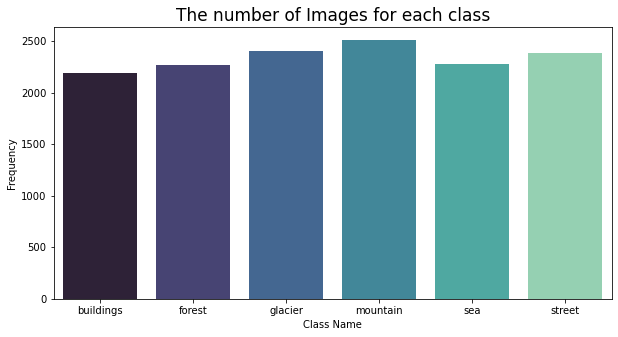

In [82]:
y = [values for values in count.values()]
plt.figure(figsize = (10,5))
sns.barplot(x = labels, y = y, palette = 'mako')
plt.title('The number of Images for each class', fontsize = 17)
plt.xlabel('Class Name')
plt.ylabel('Frequency')
plt.show()

In [83]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [84]:
class_names = train_ds.class_names

AttributeError: 'PrefetchDataset' object has no attribute 'class_names'